In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

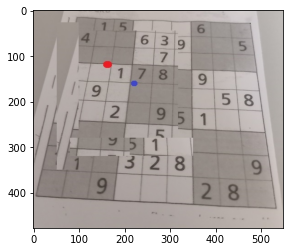

In [2]:
imframe = Image.open('sudoku3.jpg')
plt.imshow(imframe)
leds=[[128, 159],[162, 205]]
vermellrgb=[208, 53, 61]
blaurgb=[101, 98, 183]
radi=30
RGBdif=10

In [5]:
#
np3D=np.array(imframe)
print(np3D.shape)
#convertim a numpy de 2D (pixels, codiRGB)
npframe = np.array(imframe.getdata())
#i ara a dataframe
imgrgbdf = pd.DataFrame(npframe)
imgrgbdf=imgrgbdf.rename(columns={0:"R",1:"G",2:"B"})
imgrgbdf["a"]=imgrgbdf.index.astype(int)
imgrgbdf["X"]=(imgrgbdf.a/np3D.shape[1]).astype(int)
imgrgbdf["Y"]=imgrgbdf.a-imgrgbdf["X"]*np3D.shape[1]
imgrgbdf['distVermell']=np.sqrt((imgrgbdf.X-leds[0][0])**2+(imgrgbdf.Y-leds[0][1])**2)
imgrgbdf['distBlau']=np.sqrt((imgrgbdf.X-leds[1][0])**2+(imgrgbdf.Y-leds[1][1])**2)
imgrgbdf.head()

(478, 548, 3)


,R,G,B,a,X,Y,distVermell,distBlau
0,160,151,144,0,0,0,204.120063,261.283371
1,159,150,143,1,0,1,203.342076,260.499520
2,159,150,143,2,0,2,202.566039,259.717154
3,159,150,143,3,0,3,201.791972,258.936286
4,159,150,143,4,0,4,201.019900,258.156929


In [14]:
#Blau=imgrgbdf[(imgrgbdf.distBlau<radi)&(np.abs(imgrgbdf.R-blaurgb[0])<RGBdif)&(np.abs(imgrgbdf.G-blaurgb[1])<RGBdif)&(np.abs(imgrgbdf.B-blaurgb[2])<RGBdif)]
Blau=imgrgbdf[(imgrgbdf.distBlau<radi)&(np.abs(imgrgbdf.B-blaurgb[2])<RGBdif)]
#Blau=imgrgbdf[(imgrgbdf.distBlau<radi)]
Blau.describe()

,R,G,B,a,X,Y,distVermell,distBlau
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,118.967213,117.950820,181.295082,87644.327869,159.540984,215.868852,65.490494,17.893073
std,46.287135,42.929177,5.678451,4272.744780,7.787969,13.070929,13.053547,5.679078
min,63.000000,65.000000,174.000000,74736.000000,136.000000,176.000000,30.232433,4.242641
25%,71.000000,72.000000,176.000000,85704.000000,156.000000,216.000000,65.368188,13.928388
50%,135.000000,134.000000,181.000000,87896.000000,160.000000,220.000000,69.079664,18.681542
75%,142.000000,141.000000,186.000000,90639.000000,165.000000,224.000000,74.732858,22.022716
max,187.000000,180.000000,192.000000,104870.000000,191.000000,229.000000,77.826731,29.614186


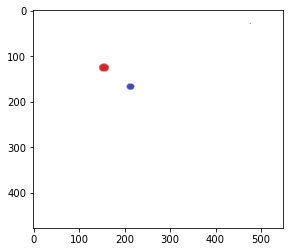

In [7]:
imgrgbdf['Rnou'] = np.where(imgrgbdf['dif']>20, imgrgbdf['R2'], 255)
imgrgbdf['Gnou'] =np.where(imgrgbdf['dif']>20, imgrgbdf['G2'], 255)
imgrgbdf['Bnou'] =np.where(imgrgbdf['dif']>20, imgrgbdf['B2'], 255)
npModificat=imgrgbdf[['Rnou','Gnou','Bnou']].to_numpy()
npModificat=npModificat.reshape(478, 548, 3)
im3=Image.fromarray(npModificat.astype(np.uint8))
plt.imshow(im3)

In [9]:
imgrgbdf=imgrgbdf[(imgrgbdf.Bnou<255)&(imgrgbdf.X>30)]
imgrgbdf

,R,G,B,R2,G2,B2,a,X,Y,dif,Rnou,Gnou,Bnou
64268,147,138,133,168,129,130,64268,117,152,33,168,129,130
64269,146,137,132,168,127,131,64269,117,153,33,168,127,131
64270,146,137,132,162,131,129,64270,117,154,25,162,131,129
64271,146,137,132,161,132,128,64271,117,155,24,161,132,128
64272,146,137,132,167,130,124,64272,117,156,36,167,130,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95565,149,142,136,140,140,168,95565,174,213,43,140,140,168
95566,148,141,135,141,138,165,95566,174,214,40,141,138,165
95567,148,141,135,143,140,167,95567,174,215,38,143,140,167
95568,147,140,134,141,135,169,95568,174,216,46,141,135,169


In [16]:
#detectam centre del blau
blau=imgrgbdf[imgrgbdf.Bnou<150]
#detectam el centre del vermell
vermell=imgrgbdf[imgrgbdf.Bnou>150]
leds=[[blau[['X']].mean()[0],blau[['Y']].mean()[0]],[vermell[['X']].mean()[0],vermell[['Y']].mean()[0]]]
leds

[[128.21495327102804, 159.33021806853583],
 [162.41826923076923, 205.11057692307693]]

In [22]:
#Detectam posició i angle
posX=int((leds[0][0]+leds[1][0])/2)
posY=int((leds[0][1]+leds[1][1])/2)
#alfa=np.arctan((leds[1][1]-leds[0][1])/(leds[1][0]+leds[0][0]))*180/np.pi

alfa=np.arctan(1)*180/np.pi
retorno=[posX,posY,alfa]
retorno

[145, 182, 45.0]